In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from crossref.restful import Works
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords


## Helper Functions

In [3]:
def key_error_handler(item, key):
    """
        Attempts to map key name with Works JSON.
        Returns Null if no mapping exists.
        --------
    """
    try:
        return item[key]
    except KeyError as err:
        return ''
    

def top_tokens(df, vectorizer, independent_var, number_of_tokens=10):
    """
        Returns a bar chart of the most common tokens given a particular
        vectorizer implementation
        --------
    """
    vectorizer_df = pd.DataFrame(vectorizer.fit_transform(df[independent_var]).toarray(),
                                 columns=vectorizer.get_feature_names())

    top_tokens = pd.DataFrame(vectorizer_df.sum(
        axis=0).sort_values(ascending=False).head(number_of_tokens))
    top_tokens.columns = ['Token_Count']
    
    plt.figure()
    ax = sns.barplot(x='Token_Count', y=top_tokens.index, data=top_tokens)
    
    return top_tokens


In [4]:
if __name__ == '__main__':
    try:
        print("ATTEMPTING TO RELOAD SAVED QUERY...")
        df = pd.read_pickle("./cross_ref_test.pkl")

    except FileNotFoundError:
        print("Querying CrossRef API...")
        works = Works()
        w1 = works.query().filter(from_online_pub_date='2017')

        headers = ['title', 'container-title', 'abstract', 'issued']
        df = pd.DataFrame([key_error_handler(item, headers[0]), key_error_handler(item, headers[1]),
                           key_error_handler(item, headers[2]), item[headers[3]]['date-parts'][0][0]]
                          for item in w1.sample(40))

        pandas_headers = ['title', 'container-title', 'abstract', 'year_issued']
        df.columns = pandas_headers
        df['title'] = [str(element) for element in df['title']]  # Convert title from lists to strings
        df.to_pickle("./cross_ref_test.pkl")  # Save final df locally

df

ATTEMPTING TO RELOAD SAVED QUERY...
Querying CrossRef API...


,title,container-title,abstract,year_issued
0,"[""Soudage de tôles minces en acier inoxydable ...",[Revue de Métallurgie],,1962
1,['Big data analytics for network and service m...,[International Journal of Network Management],,2017
2,['Development of Scales to Measure and Analyse...,[International Journal of Environmental Resear...,<jats:p>China’s construction industry has expe...,2019
3,['Taxonomic studies on the genus Orancistrocer...,[Zootaxa],<jats:p>Two species of the genus Orancistrocer...,2019
4,['Employers and Foreign Migrants in the Labor ...,[Studies on Russian Economic Development],,2018
5,['The crystal structure of Penaeus vannamei no...,,,2018
6,['Meetings'],[Cell Transplantation],,1996
7,['0970 SLEEP TIME IS NOT INCREASED IN ORTHODOX...,[Sleep],,2017
8,"['Review of Økland, Jorunn, J. Cornelis de Vos...",[Journal of Hebrew Scriptures],,2018
9,['A wavelet approach towards examining dynamic...,[International Journal of Data and Network Sci...,,2019


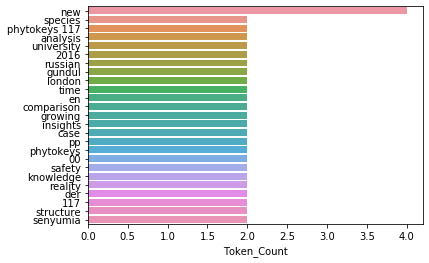

In [5]:
custom_stop_words = stopwords.words('english')
newStopWords = ['jats', 'lt', 'span', 'gt', 'de']
custom_stop_words.extend(newStopWords)

vectorizer = CountVectorizer(stop_words=custom_stop_words, ngram_range=(1, 3))
title_tokens = top_tokens(df, vectorizer, 'title', number_of_tokens=25)

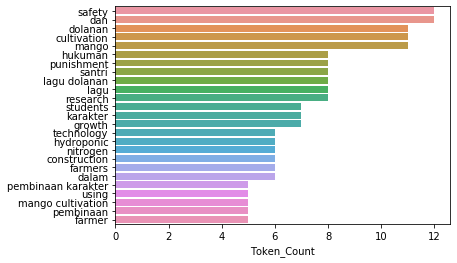

In [6]:
abstract_tokens = top_tokens(df, vectorizer, 'abstract', number_of_tokens=25)

In [7]:
agg_tokens = pd.DataFrame(title_tokens.merge(abstract_tokens, how='outer',
                                             left_index=True, right_index=True).fillna(0).sum(axis=1))
agg_tokens.columns = ['count']
agg_tokens.head()

,count
00,2.0
117,2.0
2016,2.0
analysis,2.0
case,2.0
